# Imporing Libraries

In [1]:
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Processing
import numpy as np
import pandas as pd
import pickle
from gensim.models import Word2Vec

# NLP 
import re
import gensim
import nltk
import spacy
from nltk.corpus import stopwords
nltk.download('wordnet')

# ML
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

# BERT
import torch
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM
from scipy.spatial.distance import cosine

# Others
import os
import warnings



[nltk_data] Downloading package wordnet to /Users/kaushik-
[nltk_data]     shakkari/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Processing and Preparing Data

## Processing Given Data 

In [2]:
#given dataset
df_given = pd.read_csv('../data/given_counsel_chat_dataset.csv')

In [3]:
df_given.sample(5)

,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split
1428,595,How do I get my dad to understand that I don't...,I have known her for years. She was dating my ...,https://counselchat.com/questions/how-do-i-get...,family-conflict,Jennifer GerlachYour Story Matters,https://counselchat.com/therapists/jennifer-ge...,That's intense. This person moving from a frie...,0,14,train
677,246,How do I kick my stepdaughter out of our house...,"She's in her early 20s, and she has a toddler.",https://counselchat.com/questions/how-do-i-kic...,parenting,"Valerie Saisi, NCC, LPCParenting, Child, and F...",https://counselchat.com/therapists/valerie-sai...,This is something you will have to discuss wit...,0,82,train
371,145,What are the best ways to reduce anxiety?,"I have anxieties about everyday stressors, i.e...",https://counselchat.com/questions/what-are-the...,anxiety,"Nicole StoneAnxiety, relationship crisis, and ...",https://counselchat.com/therapists/nicole-stone,Something to remember about anxiety is that it...,1,231,train
1752,764,I feel like I could never be with anyone becau...,What do I do if I have been feeling like I cou...,https://counselchat.com/questions/i-feel-like-...,relationships,Earl LewisRelationship Expert,https://counselchat.com/therapists/earl-lewis,What would make you feel no one wants to be wi...,0,206,val
957,382,I want to be a boy but I can't because of my r...,"I was born a girl, but I want to be a boy. Bec...",https://counselchat.com/questions/i-want-to-be...,spirituality,"Christina McGrath Fair""Enlightenment is when a...",https://counselchat.com/therapists/christina-m...,It is really important for you to be comfortab...,0,52,train


In [4]:
df_given.dropna(inplace = True)

In [5]:
df_given.shape

(2129, 11)

In [6]:
df_given.topic.nunique()

31

## Processing Crawled Data

In [7]:
path = "../data/CouncilChat-CrawledData/"

files = os.listdir(path)

files_xls = [f for f in files if f[-4:] == 'xlsx']

list_df = []

temp = []

for index, filename in enumerate(files_xls):
    try: 
        list_df.append(pd.read_excel(path+filename))
        temp.append(filename.split(".")[0])
    except:
        temp.append()

df_crawled = pd.concat(list_df)

In [8]:
df_crawled.dropna(inplace = True)

In [9]:
df_crawled.head()

,Unnamed: 0,questionID,questionTitle,questionText,questionLink,topic,therapistName,therapistTitle,therapistURL,answerText,upvotes,views
0,0,1,I just lost my grandpa,I just lost my grandpa and i'm having a rough ...,https://counselchat.com/questions/i-just-lost-...,grief-and-loss,Ian Palombo,#ThoughtMediator & #LifeUntangler,https://counselchat.com/therapists/ian-palombo,Feeling profound sadness after the death of a ...,0,92
1,1,1,I just lost my grandpa,I just lost my grandpa and i'm having a rough ...,https://counselchat.com/questions/i-just-lost-...,grief-and-loss,Dr. Melissa Valentina,Honor Yourself and Live Your Truth,https://counselchat.com/therapists/dr-melissa-...,If you connect with your therapist and can say...,0,16
2,2,1,I just lost my grandpa,I just lost my grandpa and i'm having a rough ...,https://counselchat.com/questions/i-just-lost-...,grief-and-loss,Dr. Timothy Paul,"'man'; Online - ""Natural Health Consultant and...",https://counselchat.com/therapists/dr-timothy-...,"Yknow, to see a man youve loved and care for p...",0,30
3,3,1,I just lost my grandpa,I just lost my grandpa and i'm having a rough ...,https://counselchat.com/questions/i-just-lost-...,grief-and-loss,Christina McGrath Fair,"""Enlightenment is when a wave realizes it is t...",https://counselchat.com/therapists/christina-m...,I am sorry for your loss. I understand the dif...,0,157
4,4,1,I just lost my grandpa,I just lost my grandpa and i'm having a rough ...,https://counselchat.com/questions/i-just-lost-...,grief-and-loss,Pamela Suraci,"Build on your strengths, grow in your challeng...",https://counselchat.com/therapists/pamela-suraci,"Losing someone you love, someone who has been ...",0,231


In [10]:
df_crawled.drop("Unnamed: 0", axis = 1, inplace = True)

In [11]:
df_crawled.shape

(12139, 11)

## Combining Two Dataframes 

In [16]:
df = pd.concat([df_given[["questionTitle","questionText","questionLink","topic","answerText","upvotes","views"]],df_crawled[["questionTitle","questionText","questionLink","topic","answerText","upvotes","views"]]])

In [17]:
df.shape

(14268, 7)

In [18]:
df.questionTitle.nunique()

831

## Generating Root Topics 

In [ ]:
for i in range(df.shape[0]):
    if df.loc[i,"topic"] in ["relationships","intimacy","family-conflict","parenting","relationship-dissolution","marriage","domestic-violence"]:
        df.loc[i,"root_topic"] = "family_conflicts"
    elif df.loc[i,"topic"] in ["depression","anxiety","stress","anger-management","trauma"]:
        df.loc[i,"root_topic"] = "emotional_conflicts"
    else:
        df.loc[i,"root_topic"] = "others"

In [96]:
df.sort_values(by=['upvotes','views'], ascending=False, inplace = True)

In [97]:
df.drop_duplicates(subset=['questionTitle','topic'], keep="first",inplace = True)
df = df.reset_index()
df = df.drop("index", axis = 1)

In [98]:
df.shape

(1449, 7)

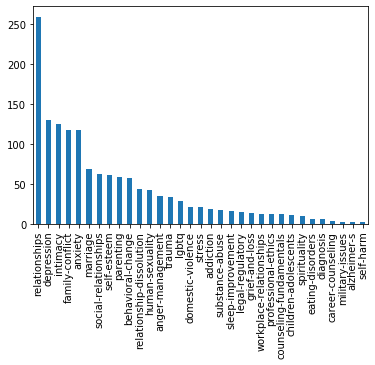

In [99]:
df.topic.value_counts().apply(lambda x:x).plot(kind='bar')

In [79]:
for i in range(df.shape[0]):
    if df.loc[i,"topic"] in ["relationships","intimacy","family-conflict","parenting","relationship-dissolution","marriage","domestic-violence"]:
        df.loc[i,"root_topic"] = "family_conflicts"
    elif df.loc[i,"topic"] in ["depression","anxiety","stress","anger-management","trauma"]:
        df.loc[i,"root_topic"] = "emotional_conflicts"
    else:
        df.loc[i,"root_topic"] = "others"

In [80]:
df.head()

,questionTitle,questionText,questionLink,topic,answerText,upvotes,views,root_topic
0,How can I keep a long distance relationship go...,We weren't long distance until he joined the m...,https://counselchat.com/questions/how-can-i-ke...,relationships,Hello. You are asking a very good question abo...,9,481,family_conflicts
1,How can I keep a long distance relationship go...,We weren't long distance until he joined the m...,https://counselchat.com/questions/how-can-i-ke...,military-issues,Hello. You are asking a very good question abo...,9,481,others
2,How can I ask my boyfriend about who he's text...,We've been in a long distance relationship for...,https://counselchat.com/questions/how-can-i-as...,relationships,I agree with Sherry that in a close intimate r...,9,472,family_conflicts
3,Why do I feel like I'm always wrong in everyth...,My wife is always accusing me of cheating and ...,https://counselchat.com/questions/why-do-i-fee...,workplace-relationships,Hello. That must be very frustrating for you t...,9,268,others
4,Why do I feel sad all the time?,I just feel sad all the time and I don't like ...,https://counselchat.com/questions/why-do-i-fee...,family-conflict,"Hello,While one can be sad from time to time, ...",9,264,family_conflicts


In [81]:
df.shape

(1449, 8)

In [191]:
len(list(df.topic.unique()))

31

In [194]:
df_original = pd.read_csv('/Users/kaushik-shakkari/Downloads/counsel_chat_dataset.csv')

In [193]:
temp

['grief-and-loss',
 'diagnosis',
 'relationship-dissolution',
 'social-relationships',
 'career-counseling',
 'anxiety',
 'children-adolescents',
 'sleep-improvement',
 'relationships',
 'family-conflict',
 'behavioral-change',
 'stress',
 'professional-ethics',
 'substance-abuse',
 'depression',
 'human-sexuality',
 'counseling-fundamentals',
 'self-esteem',
 'domestic-violence',
 'parenting',
 'trauma',
 'intimacy',
 'anger-management',
 'self-harm',
 'workplace-relationships',
 'eating-disorders',
 'legal-regulatory',
 'spirituality',
 'lgbtq',
 'addiction',
 'marriage',
 'alzheimer-s',
 'military-issues']

In [130]:
df_temp = pd.read_excel(path+"depression.xlsx")

In [131]:
df_temp.shape

(1655, 12)

In [156]:
df_temp.topic.nunique()

1

In [ ]:
df_temp = pd.read_excel(path+"depression.xlsx")

In [195]:
df_temp = df.drop_duplicates(subset='questionTitle', keep="first")
df = df.reset_index()
df = df.drop("index", axis = 1)